In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import h5py
import sys
import os
import glob
import warnings
from pprint import pprint
import matplotlib.pyplot as plt

from tqdm import tqdm

import torch
if torch.cuda.is_available():
    device = torch.device('cuda:0')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')
print('Using device: ', device)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 6

warnings.filterwarnings('ignore')

Using device:  cuda:0


100%|██████████| 4/4 [00:00<00:00, 291.84it/s]


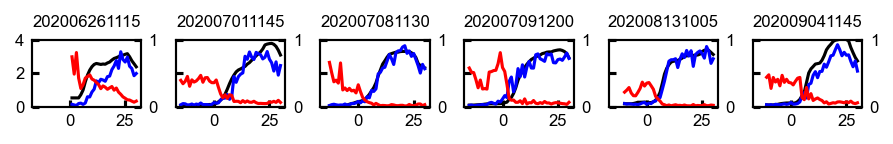

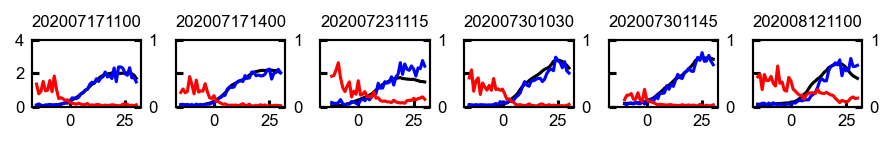

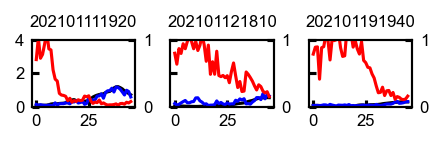

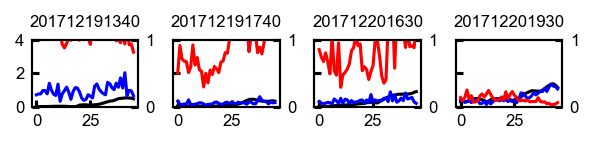

In [2]:
from mutant_datasets import *
from plotting import residual
from morphogenesis.flow_networks.translation_models import MaskedVAE
from morphogenesis.plot_utils import *

model = MaskedVAE(in_channels=4, 
                  out_channels=2, 
                  num_latent=64, 
                  stage_dims=[[32,32], [64,64], [128,128], [256,256]])
info = torch.load('tb_logs/MaskedVAE_sqh_beta=0.0001_split=embryo')
model.load_state_dict(info['state_dict'])
model.to(device)


dataset = WTDataset()
embryos = dataset.df.embryoID.unique()
fig, ax = plt.subplots(1, len(embryos), dpi=150, 
                       sharex=True, sharey=True, figsize=(len(embryos), 1))

for i, eId in enumerate(embryos):
    m, v0, t = dataset.get_trajectory(eId)
    m = torch.FloatTensor(m).to(device).reshape([-1, 4, 236, 200])
    v1, _ = model(m)
    v1 = v1.detach().cpu().numpy()

    v_nrm = np.linalg.norm(v0, axis=1).mean(axis=(1,2))
    ax[i].plot(t, np.linalg.norm(v0, axis=1).mean(axis=(1,2)), color='black')
    ax[i].plot(t, np.linalg.norm(v1, axis=1).mean(axis=(1,2)), color='blue')
    ax[i].set_title(eId)

    ax2 = ax[i].twinx()
    ax2.plot(t, residual(v0, v1), color='red')
    ax2.set_ylim([0, 1])
    ax2.set_yticks([0, 1])

ax[0].set_ylim([0, 4])

plt.tight_layout()

dataset = TwistDataset()
embryos = dataset.df.embryoID.unique()
fig, ax = plt.subplots(1, len(embryos), dpi=150, 
                       sharex=True, sharey=True, figsize=(len(embryos), 1))

for i, eId in enumerate(embryos):
    m, v0, t = dataset.get_trajectory(eId)
    m = torch.FloatTensor(m).to(device).reshape([-1, 4, 236, 200])
    v1, _ = model(m)
    v1 = v1.detach().cpu().numpy()

    v_nrm = np.linalg.norm(v0, axis=1).mean(axis=(1,2))
    ax[i].plot(t, np.linalg.norm(v0, axis=1).mean(axis=(1,2)), color='black')
    ax[i].plot(t, np.linalg.norm(v1, axis=1).mean(axis=(1,2)), color='blue')
    ax[i].set_title(eId)

    ax2 = ax[i].twinx()
    ax2.plot(t, residual(v0, v1), color='red')
    ax2.set_ylim([0, 1])
    ax2.set_yticks([0, 1])

ax[0].set_ylim([0, 4])

plt.tight_layout()

dataset = TollDataset()
embryos = dataset.df.embryoID.unique()
fig, ax = plt.subplots(1, len(embryos), dpi=150, 
                       sharex=True, sharey=True, figsize=(len(embryos), 1))

for i, eId in enumerate(embryos):
    m, v0, t = dataset.get_trajectory(eId)
    m = torch.FloatTensor(m).to(device).reshape([-1, 4, 236, 200])
    v1, _ = model(m)
    v1 = v1.detach().cpu().numpy()

    v_nrm = np.linalg.norm(v0, axis=1).mean(axis=(1,2))
    ax[i].plot(t, np.linalg.norm(v0, axis=1).mean(axis=(1,2)), color='black')
    ax[i].plot(t, np.linalg.norm(v1, axis=1).mean(axis=(1,2)), color='blue')
    ax[i].set_title(eId)
    
    ax2 = ax[i].twinx()
    ax2.plot(t, residual(v0, v1), color='red')
    ax2.set_ylim([0, 1])
    ax2.set_yticks([0, 1])

ax[0].set_ylim([0, 4])

plt.tight_layout()

dataset = SpaetzleDataset()
embryos = dataset.df.embryoID.unique()
fig, ax = plt.subplots(1, len(embryos), dpi=150, 
                       sharex=True, sharey=True, figsize=(len(embryos), 1))

for i, eId in enumerate(embryos):
    m, v0, t = dataset.get_trajectory(eId)
    m = torch.FloatTensor(m).to(device).reshape([-1, 4, 236, 200])
    v1, _ = model(m)
    v1 = v1.detach().cpu().numpy()

    v_nrm = np.linalg.norm(v0, axis=1).mean(axis=(1,2))
    ax[i].plot(t, np.linalg.norm(v0, axis=1).mean(axis=(1,2)), color='black')
    ax[i].plot(t, np.linalg.norm(v1, axis=1).mean(axis=(1,2)), color='blue')
    ax[i].set_title(eId)
    ax2 = ax[i].twinx()
    ax2.plot(t, residual(v0, v1), color='red')
    ax2.set_ylim([0, 1])
    ax2.set_yticks([0, 1])
    

ax[0].set_ylim([0, 4])

plt.tight_layout()